## Packages

In [2]:
library(randomForest)
library(caret)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.

Carregando pacotes exigidos: ggplot2


Attaching package: 'ggplot2'


The following object is masked from 'package:randomForest':

    margin


Carregando pacotes exigidos: lattice



## DATABASE

In [3]:
data_ = read.csv('soybean.csv', stringsAsFactors=T)
summary(data_)
dim(data_)

        date        plant.stand      precip         temp      hail    
 september:149   ?        : 36   ?      : 38   ?      : 30   ?  :121  
 august   :131   lt-normal:293   gt-norm:459   gt-norm:199   no :127  
 july     :118   normal   :354   lt-norm: 74   lt-norm: 80   yes:435  
 june     : 93                   norm   :112   norm   :374            
 october  : 90                                                        
 may      : 75                                                        
 (Other)  : 27                                                        
            crop.hist        area.damaged       severity        seed.tmt  
 ?               : 16   ?          :  1   ?         :121   ?        :121  
 diff-lst-year   : 65   low-areas  :227   minor     :195   fungicide:222  
 same-lst-sev-yrs:218   scattered  :123   pot-severe:322   none     :305  
 same-lst-two-yrs:219   upper-areas:145   severe    : 45   other    : 35  
 same-lst-yr     :165   whole-field:187                  

[1] 683  36

## Amostras

In [4]:
amostra = createDataPartition(1:dim(data_)[1], p=0.7)
summary(amostra)

amostra_treino = data_[amostra$Resample1, ]
amostra_teste = data_[-amostra$Resample1, ]

dim(amostra_treino)
dim(amostra_teste)

          Length Class  Mode   
Resample1 479    -none- numeric

[1] 479  36

[1] 204  36

## Modelo


Call:
 randomForest(formula = class ~ ., data = amostra_treino, ntree = 100,      importance = T) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 5

        OOB estimate of  error rate: 6.68%
Confusion matrix:
                            2-4-d-injury alternarialeaf-spot anthracnose
2-4-d-injury                          11                   0           0
alternarialeaf-spot                    0                  61           0
anthracnose                            0                   0          29
bacterial-blight                       0                   0           0
bacterial-pustule                      0                   0           0
brown-spot                             0                   2           0
brown-stem-rot                         0                   0           0
charcoal-rot                           0                   0           0
cyst-nematode                          0      

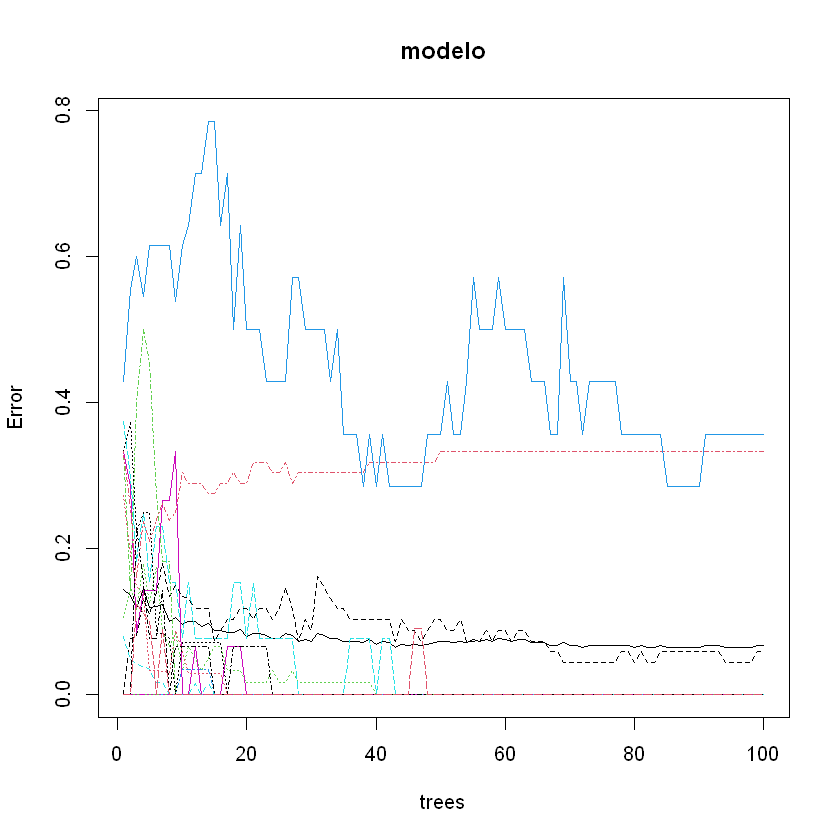

In [5]:
modelo = randomForest(class ~ ., data=amostra_treino, ntree = 100, importance = T)
modelo
plot(modelo)

## Previsão

In [6]:
previsao = predict(modelo, newdata=amostra_teste)
summary(previsao)

2-4-d-injury         alternarialeaf-spot 
                          5                          34 
                anthracnose            bacterial-blight 
                         15                           7 
          bacterial-pustule                  brown-spot 
                          5                          25 
             brown-stem-rot                charcoal-rot 
                         10                           9 
              cyst-nematode diaporthe-pod-&-stem-blight 
                          5                           8 
      diaporthe-stem-canker                downy-mildew 
                          6                           6 
         frog-eye-leaf-spot            herbicide-injury 
                         19                           1 
     phyllosticta-leaf-spot            phytophthora-rot 
                          4                          24 
             powdery-mildew           purple-seed-stain 
                          7                           5 
       rhizoctonia-root-rot 
                          9

## Matriz de Confusão

In [9]:
confusao = modelo$confusion
confusao

taxaacerto = sum(diag(confusao)) * 100 / sum(confusao)
taxaacerto

media_error = mean(confusao[, 'class.error'])
media_error

,2-4-d-injury,alternarialeaf-spot,anthracnose,bacterial-blight,bacterial-pustule,brown-spot,brown-stem-rot,charcoal-rot,cyst-nematode,diaporthe-pod-&-stem-blight,diaporthe-stem-canker,downy-mildew,frog-eye-leaf-spot,herbicide-injury,phyllosticta-leaf-spot,phytophthora-rot,powdery-mildew,purple-seed-stain,rhizoctonia-root-rot,class.error
2-4-d-injury,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000000
alternarialeaf-spot,0,61,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000000
anthracnose,0,0,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000000
bacterial-blight,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000000
bacterial-pustule,0,0,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000000
brown-spot,0,2,0,0,0,64,0,0,0,0,0,0,2,0,0,0,0,0,0,0.05882353
brown-stem-rot,0,0,0,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0.00000000
charcoal-rot,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0.00000000
cyst-nematode,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0.00000000
diaporthe-pod-&-stem-blight,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0.00000000


[1] 93.17366

[1] 0.03943683